<a href="https://colab.research.google.com/github/ChunxiaqiuY/BA865-Neural_NetworkAnalytics_Team_Real/blob/main/BA865_FakeJobAnalyse_TeamReal_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BA865: Neural Networks
# Team Project - How To Dectect Job Recruiting Fraud
**Team REAL:**
* Yipeng(Caroline) Guo / ypguo@bu.edu
* Yilun(Allen) Wang / yilun830@bu.edu
* Niming(Danny) Wang / wang2021@bu.edu
* Chunxiaqiu(Tommy) Yang / chunqiu@bu.edu
* Mochi Zhang / zhangmc@bu.edu

***

**Dataset:** 
    The Employment Scam Aegean Dataset.
    
 (*Data source: http://emscad.samos.aegean.gr/*)

  This dataset is acknowledged by the Laboratory of Information & Communication System Security, **The University of Aegean.**


**Background:**
    With the growth of enemployed and job gaps due to economic stress and coronavirus's impact, there are multiple websites or Apps that provide job recruiting, applying, and that kind of posting. The intuition of these portals should be good. However, scammers may take advantage of this and post fake job information to gather applicants' personal information and privacy, some of them may even ask for referral fee.


**Objective:**
    The project goal is to distinguish real and fake job recruiting news. Also, to get some insights of what features may have higher risk of being fake.



# Summary of The Dataset

With thousands of hiring news collected with their detailed description, it allows us to dig deeper than we would imagine.

This dataset contains 17.879 posting entries with 18 features captured, out of which 866 are fake. It consists of both textual information and meta-information about the jobs.

About the arributes, some specific ones triggered our interest as listed:

- Basic information: Title, Location, Department, Industry etc.
- Money matter: Salary range (if posted)
- Employment type: Part-time, full-time, contract or others
- Requirement: Required experience, required education, and detailed requirements as sophisticated text
- Company profile: What kind of company they are (text description)
- Job Description: What kind of jobs that are open (text description)


Also, our target feature is ***fraudulent***, whether it is a fake job posting or not.

Data preparing for our model:

**For categorical variables, we**

- Give scale, or
- Get dummies

**For text variables,** we combine them and apply TextVectorization()

**For other two special variables, we**

- Salary range: Seperate the range and get upper & lower bound
- Location: Combine with text


# 1. Data Preprocessing

## 1.1 Imports and Data Loading

In [ ]:
# Installs 
! pip install mlxtend
! pip install scikit-plot
! pip install newspaper3k
! pip install -U spacy
! pip install -U textacy
! pip install wordcloud
! pip install emoji
! pip install nltk
! pip install scikit-plot
! pip install spacytextblob
! pip install afinn
! pip install pysrt
! pip install textdescriptives
! pip install tokenwiser
! pip install pyyaml==5.4.1

     |████████████████████████████████| 211 kB 4.6 MB/s 
     |████████████████████████████████| 81 kB 5.2 MB/s 
     |████████████████████████████████| 87 kB 3.2 MB/s 
     |████████████████████████████████| 7.4 MB 6.6 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=0f0aec9cc44dda51d0aca974a424b82b7256af86730b5cf27a7511fc432e8052
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=e76e51d40e83b47911d9ecc610bd95be3b7100f346ae9ce4796329f9f35e5cab
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=e7a52ef4b4553290b944aeb870217de1101f08750c8c9e9e40379f65709922f2
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a5979574324

In [ ]:
# imports
# for plotly
import plotly.express as px

from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
import os
import numpy as np
from PIL import Image
import uuid
import pandas as pd
import cv2   
import random
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics 
from sklearn.datasets import make_blobs
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

#Principal component analysis (PCA) for reducing the dimensionality of data
from sklearn.decomposition import PCA
from sklearn import metrics 
import scikitplot as skplt

# color maps
from matplotlib import cm

# some "fun" packages
from wordcloud import WordCloud
import emoji
import re

# text imports
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import json

# text imports
from spacy import cli
import textdescriptives as td
import tokenwiser
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import gensim
from afinn import Afinn
from newspaper import Article
import warnings
warnings.filterwarnings("ignore")

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

#for k-means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

# for keras
from tensorflow.keras import utils



/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Read the dataset from the github repo
url = "https://raw.githubusercontent.com/ChunxiaqiuY/BA865-Advanced-Analytics_Team-Great/main/fake_job_postings.csv"
df = pd.read_csv(url)

#Basic understanding of the data, sample data
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
8030,8032,Digital Sales Superstar,"GB, LND, London",Sales,NaN,NaN,We are an enthusiastic team of performance-dri...,NaN,NaN,0,0,1,Full-time,Director,Master's Degree,Internet,Sales,0
4078,4080,Marketing Manager,"GB, LND, London",NaN,NaN,NOW: Pensions is a UK based multi-employer tru...,"NOW: Pensions is looking for a proactive, full...",Ability to think creatively and bring innovati...,"Up to a 15% discretionary bonus, PMI (and a ca...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Marketing,0
13998,14000,Human Centered Designer,"US, , Manhattan Beach",Design,NaN,The Boston Consulting Group (#URL_45423e1e1670...,THE COMPANY: BCG Digital Ventures (#URL_4968ff...,EDUCATION: Undergraduate degree in Product des...,Why BCG?Is BCG for me?Career GrowthWorking at ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0
17022,17024,Job opening for SFDC Consultant,"US, NC, Charlotte",NaN,NaN,e-Solutions Inc. is a talent-driven consulting...,Title : SFDC Consultant ...,SFDC Design experience including experience i...,NaN,0,1,0,Full-time,NaN,NaN,NaN,NaN,0
3,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
##Check missing value in each category
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15011
company_profile         3308
description                1
requirements            2695
benefits                7209
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8104
industry                4902
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17879 entries, 0 to 17878
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17879 non-null  int64 
 1   title                17879 non-null  object
 2   location             17533 non-null  object
 3   department           6332 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14571 non-null  object
 6   description          17878 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17879 non-null  int64 
 10  has_company_logo     17879 non-null  int64 
 11  has_questions        17879 non-null  int64 
 12  employment_type      14408 non-null  object
 13  required_experience  10829 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

## 1.2 Descriptive Statistics

In [ ]:
df.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salary_lower,salary_upper
count,17879.000000,17879,17879,17879,17879.000000,17879,17879,17879,17879,17879.000000,17879.000000,17879.000000,17879.000000,17879.000000,17879,17879,17879,17879.000000,1.787900e+04,1.787900e+04
unique,NaN,11231,3106,1338,875.000000,1710,14801,11969,6206,NaN,NaN,NaN,NaN,NaN,14,132,38,NaN,NaN,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",unknown,658403.609667,unknown,"Play with kids, get paid for it Love travel? J...",unknown,unknown,NaN,NaN,NaN,NaN,NaN,unknown,unknown,unknown,NaN,NaN,NaN
freq,NaN,311,718,11547,15011.000000,3308,379,2695,7209,NaN,NaN,NaN,NaN,NaN,8104,4902,6455,NaN,NaN,NaN
mean,8941.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042899,0.795291,0.491750,1.276749,3.950612,NaN,NaN,NaN,0.048437,8.192093e+04,1.291180e+05
std,5161.367067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202636,0.403500,0.499946,1.983101,2.689692,NaN,NaN,NaN,0.214693,7.055629e+06,1.078822e+07
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,-1.000000e+00,-1.000000e+00
25%,4471.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,-1.000000e+00,-1.000000e+00
50%,8941.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,-1.000000e+00,-1.000000e+00
75%,13410.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,2.000000,7.000000,NaN,NaN,NaN,0.000000,-1.000000e+00,-1.000000e+00


In [ ]:
# Set palette and target
target = 'fraudulent'
col = ['#ff6969', '#69ff8e'] # Used when we consider the graphs in relation to the target variable. Red - not promoted, Green - promoted

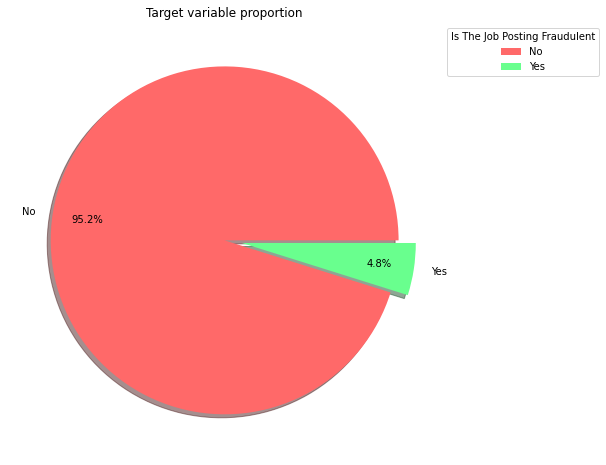

In [ ]:
# Plot the distribution of target to check whether this data is balanced.

sizes = [df.query(f'{target} == 0').shape[0],
         df.query(f'{target} == 1').shape[0]]

plt.figure(figsize=(12, 8))
plt.title('Target variable proportion')
plt.pie(sizes, labels=['No', 'Yes'], colors = col, autopct="%.1f%%", pctdistance=0.8, explode=[0,0.1], shadow=True)
plt.legend(title='Is The Job Posting Fraudulent', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))
plt.show()

Apparantly this dataset is **unbalanced**. 

Over 17k entries, it contains only 866 fake job recruiting news, accounted for 4.8%. And we should keep that in mind.

## 1.3 Data Preprocessing

In [ ]:
# Unknown for missing location
df.location = df.location.fillna('unknown')
# unknown for missing department
df.department = df.department.fillna('unknown')
# fill average for missing salary_range
job_salary = df.copy()
salary_temp = job_salary.salary_range.dropna()
ranges = []
#create lower bond and upper bond for salary 
salary_lower = []
salary_upper = []
for i in salary_temp:
  try:
    ranges.append(int(i.split("-")[0]))
    ranges.append(int(i.split("-")[1]))
  except:
    ranges.append(0)
np.asarray(ranges)
average_salary = np.average(ranges)
df.salary_range = df.salary_range.fillna(average_salary)
for i in df.salary_range:
  if i == average_salary:
    salary_lower.append(-1)
    salary_upper.append(-1)
  else: 
    try:
      salary_lower.append(int(i.split("-")[0]))
      salary_upper.append(int(i.split("-")[1]))
    except:
      salary_lower.append(-1)
      salary_upper.append(-1)
df['salary_lower'] = salary_lower[:17879]
df['salary_upper'] = salary_upper[:17879]
# Unknown for missing company_profile
df['company_profile'] = df['company_profile'].fillna('unknown')
# Unknown for missing description
df['description'] = df['description'].fillna('unknown')
# Unknown for missing requirements
df['requirements'] = df['requirements'].fillna('unknown')
# Unknown for missing employment, then replace the category value to numeric 
df['employment_type'] = df['employment_type'].fillna('unknown')
df['employment_type'].replace(['Full-time', 'Part-time','Contract', 'Temporary', 'Other', 'unknown'],
                        [0, 1, 2, 3, 4, 5], inplace=True)
# Unknown for missing required_experience, then replace the category value to numeric 
df['required_experience'] = df['required_experience'].fillna('unknown')
df['required_experience'].replace(['Not Applicable', 'Mid-Senior level','Associate', 'Entry level', 'Executive', 'Director', 'Internship',
                          'unknown'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
# Unknown for missing benefits
df['benefits'] = df['benefits'].fillna('unknown')
# Unknown for missing required_education
df['required_education'] = df['required_education'].fillna('unknown')
df_re = pd.get_dummies(df, columns=['required_education'])
df_re_dummy = df_re.iloc[:,17:].to_numpy()
# Unknown for missing industry
df['industry'] = df['industry'].fillna('unknown')
df_industry = pd.get_dummies(df, columns=['industry'])
df_industry_dummy = df_industry.iloc[:,17:].to_numpy()
# Unknown for missing function
df['function'] = df['function'].fillna('unknown')
df_function = pd.get_dummies(df, columns=['function'])
df_function_dummy = df_function.iloc[:,17:].to_numpy()
required_experience_c = utils.to_categorical(df['required_experience'])
employment_type_c = utils.to_categorical(df['employment_type'])
#Concatenate all numerical variables and categoralical variables
numeric =  ['salary_lower'] + ['salary_upper'] + ['telecommuting'] + ['has_company_logo'] + ['has_questions']
numeric_cate = np.concatenate((df_re_dummy,df_industry_dummy,df_function_dummy,df[numeric].to_numpy()), axis=1)


In [ ]:
##Double check all missing value are properly handled
df.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
salary_lower           0
salary_upper           0
dtype: int64

In [ ]:
#Make a copy of the orginal df, use job id as index 
job = df.copy()
job.index = job['job_id']
del job['job_id']
job.drop(['salary_range'], axis=1, inplace=True)

In [ ]:
# Let's shuffle things... 

shuffled_indices= np.arange(job.shape[0])
np.random.shuffle(shuffled_indices)

text_info = (job.title + job.location + job['company_profile'] + job.description + job.requirements + job. benefits).to_numpy()
label = np.where(job['fraudulent']==1,1,0)

print(text_info)
text_info = text_info[shuffled_indices]
numeric_cate = numeric_cate[shuffled_indices]
label = label[shuffled_indices]
print(text_info)

["Customer Service - Cloud Video ProductionNZ, , Auckland90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including P

## 1.4 TextVectorization() Layer

In [ ]:
import tensorflow as tf
import string
import re
from tensorflow import keras

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor) # We convert upper case characters to lowercase.
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "") # We find and remove punctuation.
  
def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor) # By default the separator is white space.
 
text_vectorization = keras.layers.TextVectorization(
    max_tokens=600,
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)


dataset = text_info
numeric_cate_subset = numeric_cate
text_vectorization.adapt(dataset)
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'and',
 'to',
 'the',
 'of',
 'a',
 'in',
 'with',
 'for',
 'is',
 'our',
 'we',
 'you',
 'are',
 'as',
 'be',
 'on',
 'work',
 'that',
 'or',
 'will',
 'experience',
 'an',
 'team',
 'have',
 'your',
 'all',
 'business',
 'at',
 'new',
 'company',
 'by',
 'from',
 'their',
 'customer',
 'this',
 'sales',
 'management',
 'amp',
 'development',
 'working',
 'skills',
 'services',
 'it',
 'service',
 '\xa0',
 'us',
 'looking',
 'people',
 'years',
 'other',
 'marketing',
 'who',
 'design',
 'product',
 'can',
 'not',
 'solutions',
 'more',
 'time',
 'clients',
 'data',
 'software',
 'including',
 'support',
 'help',
 'ability',
 'knowledge',
 'web',
 'job',
 'technology',
 'communication',
 'but',
 'provide',
 'customers',
 'about',
 'well',
 'through',
 'quality',
 'best',
 'environment',
 'also',
 'one',
 'project',
 'client',
 'products',
 'technical',
 'has',
 'opportunity',
 'based',
 'up',
 'great',
 'office',
 'high',
 'into',
 'strong',
 'within',
 'position',
 'm

In [ ]:
processed_text = text_vectorization(dataset)

In [ ]:
#Combine the text vectorization and other categorical variables
goal = pd.DataFrame(processed_text.numpy(), index = range(processed_text.shape[0]), columns = range(processed_text.shape[1]))
goal2 = pd.DataFrame(numeric_cate_subset, index = range(numeric_cate_subset.shape[0]), columns = range(numeric_cate_subset.shape[1]))
horizontal_concat = pd.concat([goal, goal2], axis=1)
horizontal_concat = horizontal_concat.to_numpy()

In [ ]:
#Skip one-hot encoding process because the limit of the RAM
#one_hot = tf.one_hot(horizontal_concat, depth=200)

In [ ]:
# processed_text = text_vectorization(text_info)
# one_hot = tf.one_hot(processed_text, depth=1000) # we one-hot encode those, so it becomes a length x1000 vector.

# print(one_hot.shape)

#2. Exploratory Data Analysis

## 2.1 Map of Location

First, we want to see the distribution of job location. We have transferred all of the addresses to coordinate file. The notebook for transferring is (https://github.com/ChunxiaqiuY/BA865-Neural_NetworkAnalytics_Team_Real/blob/main/Location%20to%20coordinate.ipynb)

To be precise, we'll start with importing the cordinate file.

In [ ]:
url = "https://raw.githubusercontent.com/ChunxiaqiuY/BA865-Neural_NetworkAnalytics_Team_Real/main/coordinate.csv"
df2 = pd.read_csv(url)

In [ ]:
#check our coordinate file
df2.head(5)

,Unnamed: 0,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,input_string,number_of_results,status
0,0,"Washington, DC, USA",38.907192,-77.036871,APPROXIMATE,ChIJW-T2Wt7Gt4kRKl2I1CJFUsI,"locality,political",NaN,"US, DC, Washington",1,OK
1,1,"DFW International Airport (DFW), 2400 Aviation...",32.899809,-97.040335,ROOFTOP,ChIJpyoiDWYqTIYRHCB9Bl4_MnM,"airport,establishment,point_of_interest",75261,"US, FL, Fort Worth",1,OK
2,2,"Berlin, Germany",52.520007,13.404954,APPROXIMATE,ChIJAVkDPzdOqEcRcDteW0YgIQQ,"locality,political",NaN,"DE, BE, Berlin",1,OK
3,3,"Sydney NSW, Australia",-33.868820,151.209295,APPROXIMATE,ChIJP3Sa8ziYEmsRUKgyFmh9AQM,"colloquial_area,locality,political",NaN,"AU, NSW, Sydney",1,OK
4,4,Singapore,1.355379,103.867744,APPROXIMATE,ChIJyY4rtGcX2jERIKTarqz3AAQ,"locality,political",NaN,"SG, 01, Singapore",1,OK


In [ ]:
# set up the chart from the df dataFrame
fig = px.scatter_geo(df2, 
                     # longitude is taken from the df["lon"] columns and latitude from df["lat"]
                     lon="longitude", 
                     lat="latitude", 
                     # choose the map chart's projection
                     projection="natural earth",
                     # columns which is in bold in the pop up
                     hover_name = "formatted_address",
                     # format of the popup not to display these columns' data
                     hover_data = {"formatted_address":False,
                                   "longitude": False,
                                   "latitude": False
                                     }
                     )


# scatter_geo allow to change the map date based on the information from the df dataframe, but we can separately specify the values that are common to all
# change the size of the markers to 25 and color to red
fig.update_traces(marker=dict(size=7, color="#FFB6C1"))

# fit the map to surround the points
fig.update_geos(fitbounds="locations", showcountries = True)

# add title
fig.update_layout(
        title = 'map of locations'
    )
fig.show()

We can see that majority of our job recruiting posts aggregated in North America and Europe.

## 2.2 Fradulent Rate By Other Categorical Features

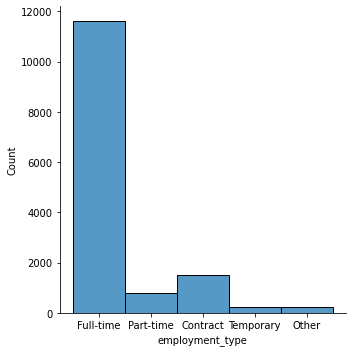

In [ ]:
# Employment Type
sns.displot(job_salary,x='employment_type')

Text(0.5, 0, 'employment type')

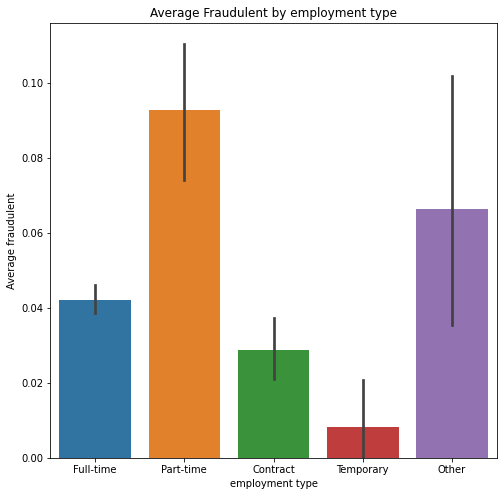

In [ ]:
# Average Fraudulent by Employment Type
plt.figure(figsize=(8,8))
sns.barplot(data=job_salary, x="employment_type", y="fraudulent")
plt.title("Average Fraudulent by employment type")
plt.ylabel("Average fraudulent")
plt.xlabel("employment type")

For the first plot, we have our employment type. Most of them are Full-time. By seeing the average fraudulent rate by employment type, we can see that fraudulent occurs more part-time jobs and other unclarified jobs.

Text(0.5, 0, 'Requirement Experience')

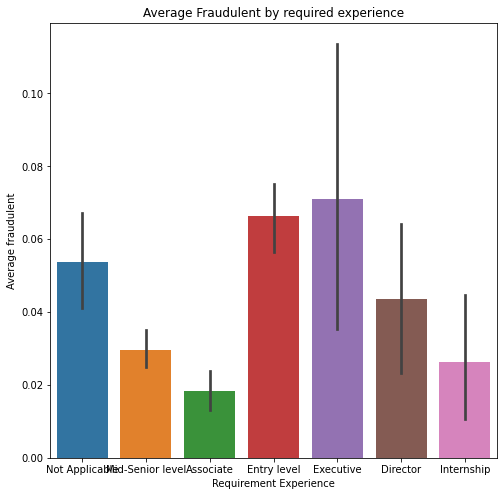

In [ ]:
# Job Requirement 
plt.figure(figsize=(8,8))
sns.barplot(data=job_salary, x="required_experience", y="fraudulent")
plt.title("Average Fraudulent by required experience")
plt.ylabel("Average fraudulent")
plt.xlabel("Requirement Experience")

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

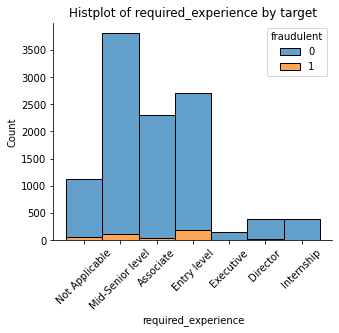

In [ ]:
# Histplot of required_experience by target
import pylab as pl
plt.figure(figsize=[5,4])
sns.histplot(x="required_experience", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of required_experience by target")
pl.xticks(rotation=45)

The plots indicates that fraudulent occurs more often among entry-level and executive levels. Either the position is quite low, or quite high. This is manipulating people's mind - too simple or too difficult requirements, can 'never' be fake.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

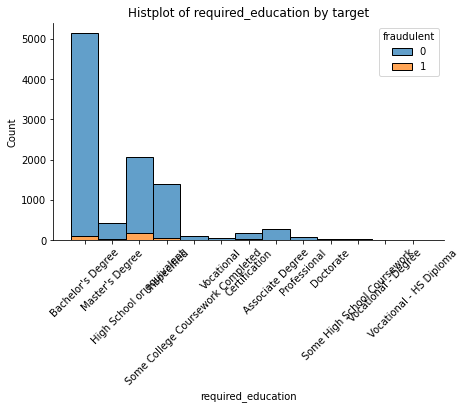

In [ ]:
# Histplot of required_education by target
plt.figure(figsize=[7,4])
sns.histplot(x="required_education", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of required_education by target")
pl.xticks(rotation=45)

The plot shows that fraudulent occurs more among people equipped with high-school or lower education degree. This maybe a signal that relatively uneducated group can be manipulated by fake job recruiting more easily.

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

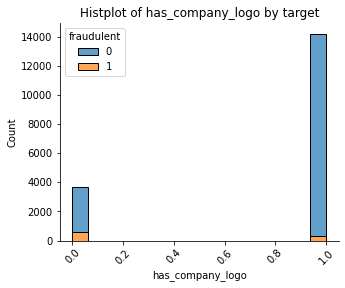

In [ ]:
# Histplot of has_company_logo by target
plt.figure(figsize=[5,4])
sns.histplot(x="has_company_logo", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of has_company_logo by target")
pl.xticks(rotation=45)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

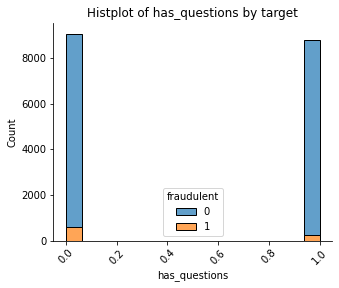

In [ ]:
# Histplot of has_questions by target
plt.figure(figsize=[5,4])
sns.histplot(x="has_questions", hue='fraudulent', edgecolor="black", multiple="stack", alpha=0.7, data=job_salary)
sns.despine()
plt.title("Histplot of has_questions by target")
pl.xticks(rotation=45)

From the perspective of whether having company logo or not, whether having specific questions to applicants or not, there is no significant difference.

# 3. Neural Networks Architecture

## 3.1 Our Own Model

Let's start with our self-designed model.

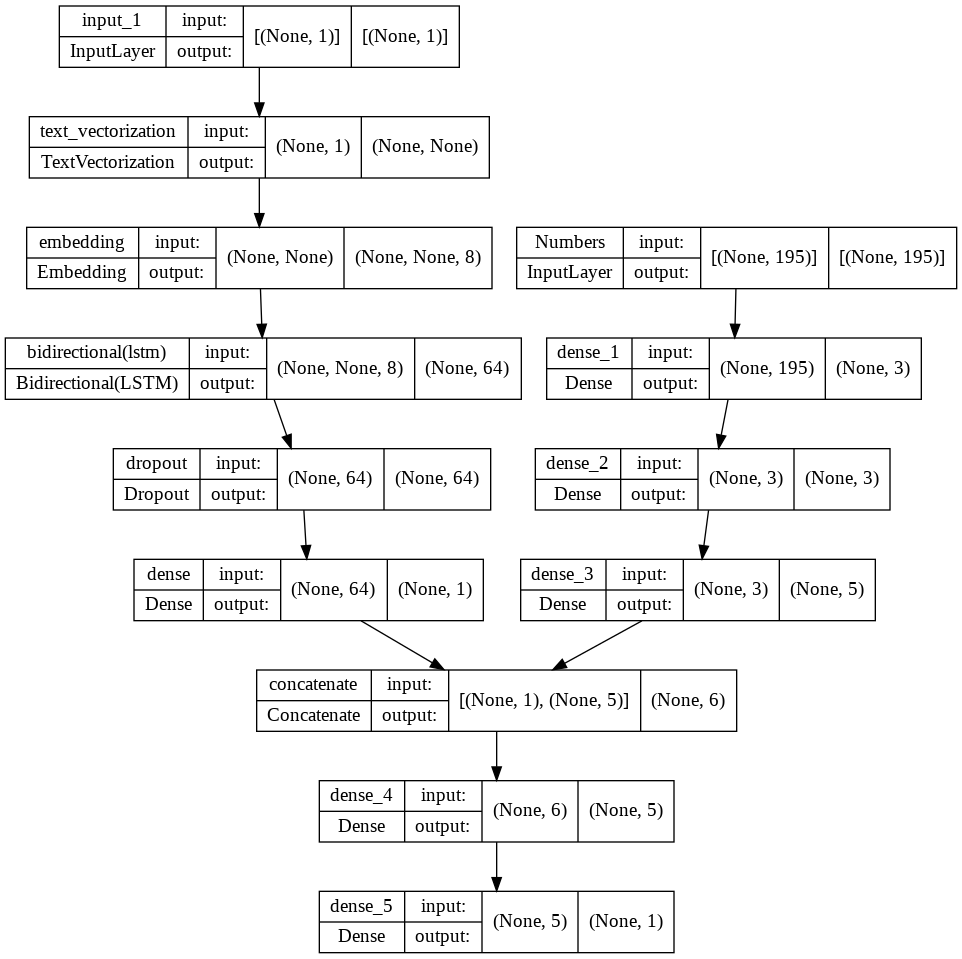

In [ ]:
def build_model_embed():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input
    processing = text_vectorization(inputs)
   
    # Truncates after 600 tokens, and pads up to 600 tokens for shorter reviews.
    # Mask zero means it will skip 0 tokens and will not pass them on.
    embedding = keras.layers.Embedding(input_dim=2000,output_dim=8,input_length=600, mask_zero=True)(processing)
   
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)

    # Define numeric input branch
    input_numeric = keras.layers.Input(numeric_cate_subset.shape[1],name="Numbers")
    x = keras.layers.Dense(3,activation="relu")(input_numeric)
    x = keras.layers.Dense(3,activation="relu")(x)
    numeric_output = keras.layers.Dense(5,activation="linear")(x) #Another option might be to have dense matrices that are wider, and you reshape them to 28x28x3 to add.

    merge = keras.layers.Concatenate()([outputs,numeric_output])
    x = keras.layers.Dense(5,activation="relu")(merge)
    final_output = keras.layers.Dense(1)(x)
 
    model = keras.Model(inputs=[inputs, input_numeric],outputs = final_output)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model
model = build_model_embed()

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Test-Train Split 
data_train = text_info[:12516] 
num_train = numeric_cate_subset[:12516]
labels_train = label[:12516]
data_test = text_info[12516:]
num_test = numeric_cate_subset[12516:]
labels_test = label[12516:]

In [ ]:
# K-fold Validation
k = 4
num_validation_samples = len(data_train) // k
num_epochs = 25
batch_sizes = 25
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_text = num_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_text = np.concatenate([
        num_train[:num_validation_samples * fold],
        num_train[num_validation_samples * (fold + 1):]])                       
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_embed()
    history = model.fit([training_data, training_text], training_targets, 
                        validation_data = ([validation_data,validation_text],validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/25
376/376 [==============================] - 46s 84ms/step - loss: 2.0993 - accuracy: 0.8448 - val_loss: 2.1533 - val_accuracy: 0.8354
Epoch 2/25
376/376 [==============================] - 27s 71ms/step - loss: 0.9904 - accuracy: 0.9129 - val_loss: 0.6475 - val_accuracy: 0.9380
Epoch 3/25
376/376 [==============================] - 27s 71ms/step - loss: 0.3841 - accuracy: 0.9493 - val_loss: 0.3579 - val_accuracy: 0.9501
Epoch 4/25
376/376 [==============================] - 27s 71ms/step - loss: 0.3652 - accuracy: 0.9526 - val_loss: 0.4202 - val_accuracy: 0.9533
Epoch 5/25
376/376 [==============================] - 27s 71ms/step - loss: 0.3709 - accuracy: 0.9565 - val_loss: 0.3632 - val_accuracy: 0.9591
Epoch 6/25
376/376 [==============================] - 26s 70ms/step - loss: 0.3873 - accuracy: 0.9580 - val_loss: 0.3141 - val_accuracy: 0.9549
Epoch 7/25
376/376 [==============================] - 26s 70ms/step - loss: 0.3614 - accuracy: 0.9592 - val_loss: 0.3596 - val_accuracy:

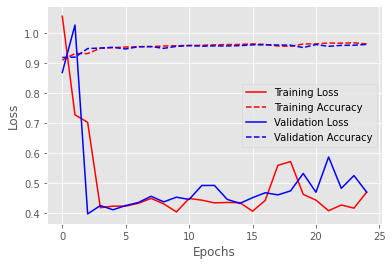

In [ ]:
# Loss-Accuracy Plot 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [ ]:
# Evaluate the holdout sample
model = build_model()
model.fit([data_train,num_train], labels_train, epochs=9,batch_size=25)

test_accc = model_glove.evaluate([data_test, num_test], labels_test)[1]*100
print(f'The resulting model is about {test_accc:.2f}% accurate in the holdout sample.')

## 3.2 Pre-trained model - Embeddings

In [ ]:
# Load the GloVe Embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-03-17 07:08:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-17 07:08:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-17 07:08:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt" 
  
embeddings_index = {} 
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1) # Split off only the first element in the row, i.e., the word, keep the remaining values as the vector.
        coefs = np.fromstring(coefs, "f", sep=" ") # Convert the set of numeric values into a numpy array, splitting elements by ' '
        embeddings_index[word] = coefs # Populate our dictionary - for this word (key), the vector representation is this vector (value).
  
glove_vec_lengths = len(coefs)

print(f"Found {len(embeddings_index)} word vectors.")
print(f"GloVe vector representations are {glove_vec_lengths} elements long.")

Found 400000 word vectors.
GloVe vector representations are 100 elements long.


In [ ]:
vocabulary = text_vectorization.get_vocabulary()
print(f"Recall that our vocabulary has {len(vocabulary)} tokens in it.")
print(f"Here is the 11th word in our vocabulary: {vocabulary[13]}.") # Recall that the first two indices are reserved for 'padding' and 'UNK'

Recall that our vocabulary has 600 tokens in it.
Here is the 11th word in our vocabulary: you.


In [ ]:
embedding_dim = glove_vec_lengths # The length of the vector representations; the latent embedding space will be in 100 dimensions. 

vocabulary = text_vectorization.get_vocabulary() # From the vocabulary our text vectorizer learned from our dataset, go over every word.
word_index = dict(zip(vocabulary, range(len(vocabulary)))) # Make a dictionary, key is word to value is index.

# Instantiate a matrix of values (these will be the 'weights' in our embedding layer)
embedding_matrix = np.zeros((len(vocabulary), embedding_dim)) # It will be the 2000 tokens by 100 (length of GloVe vectors)
for word, i in word_index.items():
    if i < len(vocabulary):
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Here is the GloVe vector embedding for 'room'
embedding_matrix[13]

array([-0.49886   ,  0.76602   ,  0.89750999, -0.78547001, -0.68550003,
        0.62608999, -0.39655   ,  0.34913   ,  0.33333999, -0.45232999,
        0.61223   ,  0.075948  ,  0.22531   ,  0.16365001,  0.28095001,
       -0.24758001,  0.0099009 ,  0.71108001, -0.75858998,  0.87423003,
        0.0031041 ,  0.35795999, -0.35233   , -0.66500002,  0.38446999,
        0.62677002, -0.51542997, -0.96653003,  0.61517   , -0.75454998,
       -0.012359  ,  1.11880004,  0.35719001,  0.0071769 ,  0.20254999,
        0.5011    , -0.44046   ,  0.10661   ,  0.79391003, -0.80948001,
       -0.015601  , -0.22888   , -0.34198001, -1.00650001, -0.87629998,
        0.15165   , -0.085339  , -0.64649999, -0.16733   , -1.44990003,
       -0.0065905 ,  0.0048113 , -0.012445  ,  1.0474    , -0.19381   ,
       -2.59910011,  0.40527999,  0.43803   ,  1.9332    ,  0.45813999,
       -0.048819  ,  1.43079996, -0.78639001, -0.20792   ,  1.09000003,
        0.24816   ,  1.1487    ,  0.51481003, -0.21832   , -0.45

In [ ]:
embedding_layer = keras.layers.Embedding(
    len(vocabulary), 
    glove_vec_lengths, # Vectors of 600 elements per word.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix), # Initialize with fixed values from our matrix.
    trainable=False, # These are weights, but they will be frozen so they don't update during training.
    mask_zero=True, # If we have a 0 token, for padding, we don't pass it through the layer.
)

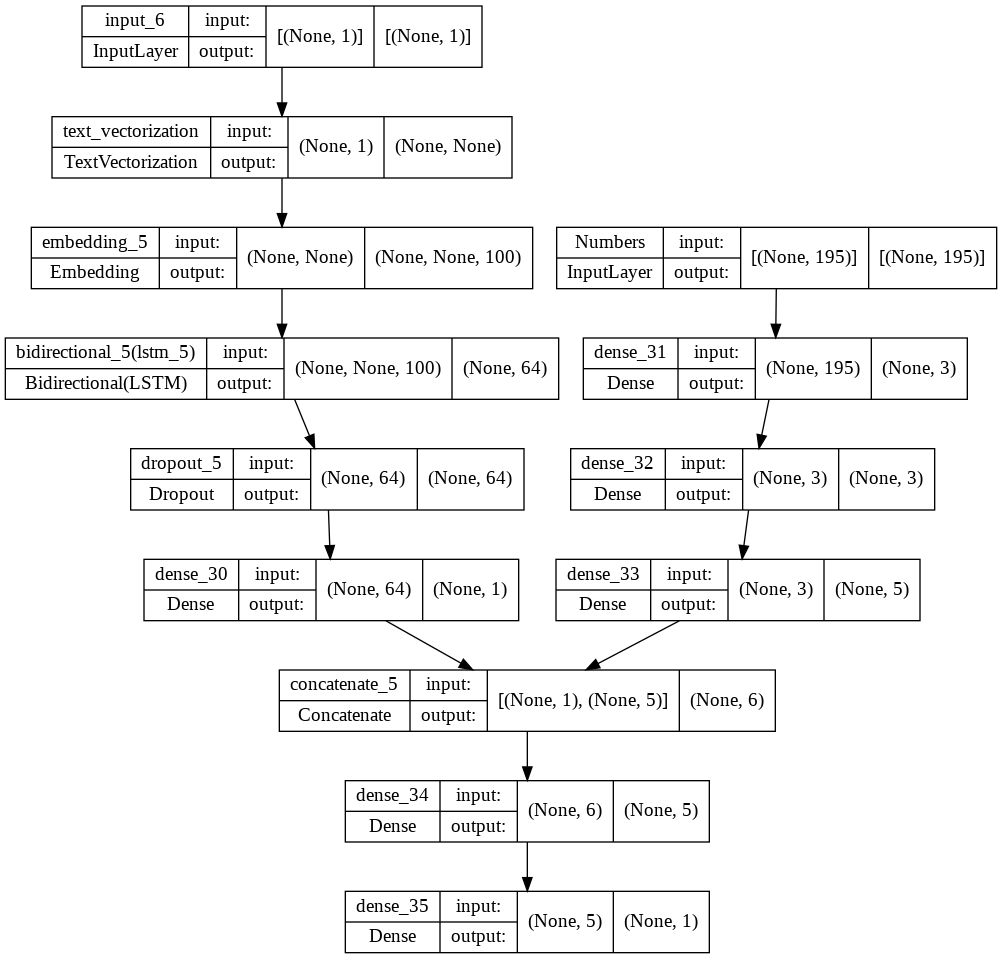

In [ ]:
# Utilize the pre-trained model
def build_model_GloVe():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    embedding = embedding_layer(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)

    # Define numeric input branch
    input_numeric = keras.layers.Input(numeric_cate_subset.shape[1],name="Numbers")
    x = keras.layers.Dense(3,activation="relu")(input_numeric)
    x = keras.layers.Dense(3,activation="relu")(x)
    numeric_output = keras.layers.Dense(5,activation="linear")(x) #Another option might be to have dense matrices that are wider, and you reshape them to 28x28x3 to add.

    merge = keras.layers.Concatenate()([outputs,numeric_output])
    x = keras.layers.Dense(5,activation="relu")(merge)
    final_output = keras.layers.Dense(1)(x)
 
    model = keras.Model(inputs=[inputs, input_numeric],outputs = final_output)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model
    

model_GloVe = build_model_GloVe()

keras.utils.plot_model(model_GloVe, show_shapes=True)

In [ ]:
# K-fold Validation
k = 4
num_validation_samples = len(data_train) // k
num_epochs = 25
batch_sizes = 25
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_text = num_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_text = np.concatenate([
        num_train[:num_validation_samples * fold],
        num_train[num_validation_samples * (fold + 1):]])                       
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_GloVe()
    history = model.fit([training_data, training_text], training_targets, 
                        validation_data = ([validation_data,validation_text],validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/25
376/376 [==============================] - 41s 81ms/step - loss: 0.7017 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 2/25
376/376 [==============================] - 27s 70ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 3/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 4/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 5/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 6/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy: 0.9501
Epoch 7/25
376/376 [==============================] - 27s 71ms/step - loss: 0.7460 - accuracy: 0.9516 - val_loss: 0.7690 - val_accuracy:

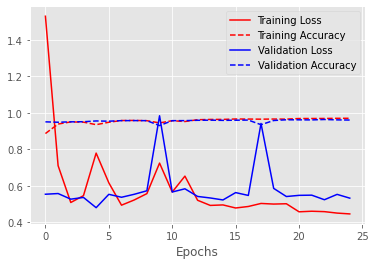

In [ ]:
# Loss-Accuracy Plot 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [ ]:
data_test.shape

(5363,)

In [ ]:
# Check the performance among test set
model_glove = build_model_GloVe()
model_glove.fit([data_train,num_train], labels_train, epochs=9,batch_size=25)

test_acc = model_glove.evaluate([data_test, num_test], labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/9
501/501 [==============================] - 43s 65ms/step - loss: 2.4797 - accuracy: 0.8369
Epoch 2/9
501/501 [==============================] - 31s 62ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 3/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4680 - accuracy: 0.8385
Epoch 4/9
501/501 [==============================] - 31s 62ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 5/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 6/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 7/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 8/9
501/501 [==============================] - 31s 61ms/step - loss: 2.4691 - accuracy: 0.8385
Epoch 9/9
168/168 [==============================] - 9s 32ms/step - loss: 2.4376 - accuracy: 0.8406
The resulting model is about 84.06% accurate in the holdout sample.


# 4. Related Analytical Approaches

## 4.1 LIME 

We would like to try LIME to check the effect of text.

In [ ]:
# Let's start with shuffle things and get them reshaped
text_info = (job.title + job.location + job['company_profile'] + job.description + job.requirements + job. benefits).to_numpy()
label = np.where(job['fraudulent']==1,1,0)
label = label.reshape(17879,1)
print(label[:1800].shape)

print(text_info)
text_info = text_info[shuffled_indices]
numeric_cate = numeric_cate[shuffled_indices]
label = label[shuffled_indices]
print(text_info)

(1800, 1)
["Customer Service - Cloud Video ProductionNZ, , Auckland90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest i

The model input needs to be numeric (it can't work with strings). So, the input layer to our model needs to be numeric sequences. 

Then we can build our model.

In [ ]:
text_vectorization = keras.layers.TextVectorization(
    max_tokens=2000, 
    output_mode="int", # This is requesting integer encodings (which means we'll have a sequence of integers),
    #output_sequence_length=700 # Up to the first 600 words.
)

text_vectorization.adapt(text_info)

process_text = text_vectorization(text_info)

In [ ]:
def build_model():
    
    input = keras.Input(shape=(2078))
    x = layers.Embedding(input_dim=2000,output_dim=8,input_length=784, mask_zero=True)(input)
    x = layers.Conv1D(filters=40,kernel_size=10,activation="relu")(x)
    x = layers.MaxPool1D(pool_size=2,strides=2)(x)
    x = layers.GlobalAveragePooling1D()(x) 
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(10,activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=input,outputs=output)

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    return model

model = build_model()

#keras.utils.plot_model(model,show_shapes=True)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="DenseNet_for_LIME.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(process_text[:14500], label[:14500], validation_split=0.2, epochs=9, batch_size=1,callbacks=callbacks)

Epoch 1/9
11600/11600 [==============================] - 91s 7ms/step - loss: 0.1814 - accuracy: 0.9526 - val_loss: 0.0990 - val_accuracy: 0.9610
Epoch 2/9
11600/11600 [==============================] - 79s 7ms/step - loss: 0.0943 - accuracy: 0.9700 - val_loss: 0.0703 - val_accuracy: 0.9755
Epoch 3/9
11600/11600 [==============================] - 80s 7ms/step - loss: 0.0730 - accuracy: 0.9765 - val_loss: 0.0692 - val_accuracy: 0.9766
Epoch 4/9
11600/11600 [==============================] - 92s 8ms/step - loss: 0.0596 - accuracy: 0.9794 - val_loss: 0.0621 - val_accuracy: 0.9797
Epoch 5/9
11600/11600 [==============================] - 78s 7ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0571 - val_accuracy: 0.9817
Epoch 6/9
11600/11600 [==============================] - 79s 7ms/step - loss: 0.0413 - accuracy: 0.9860 - val_loss: 0.0575 - val_accuracy: 0.9803
Epoch 7/9
11600/11600 [==============================] - 83s 7ms/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.0564 -

Test the model performance among test set.

In [ ]:
model = keras.models.load_model("DenseNet_for_LIME.keras")
test_perf = model.evaluate(process_text[14500:], label[14500:])
print(f'Accuracy in the test set is {test_perf[1]*100:.2f}%.')

106/106 [==============================] - 1s 6ms/step - loss: 0.0840 - accuracy: 0.9790
Accuracy in the test set is 97.90%.


In [ ]:
# Then create our LIME explainer
try:
  import lime
  from lime.lime_text import LimeTextExplainer
except ImportError as error:
  !pip install lime
  import lime
  from lime.lime_text import LimeTextExplainer

class_names=['truthful','deceptive']
explainer=LimeTextExplainer(class_names=class_names)

def new_predict(text):
  vectorized = text_vectorization(text)
  padded = keras.preprocessing.sequence.pad_sequences(vectorized, maxlen=2078,padding='post')
  pred=model.predict(padded)
  pos_neg_preds = []
  for i in pred:
    temp=i[0]
    pos_neg_preds.append(np.array([1-temp,temp])) #I would recommend rounding temp and 1-temp off to 2 places
  return np.array(pos_neg_preds)

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=40b906ef563470cd38d03d6012087a557a544f424f1ddabbd70096e16284b325
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


And, now we can call our LIME explainer on any given review.

In [ ]:
test_obs = 16000

if label[test_obs]==0:
  print(f'The ground truth label for this observation is "truthful."')
else:
  print(f'The ground truth label for this observation is "deceptive."')

explainer.explain_instance(text_info[test_obs],new_predict).show_in_notebook(text=True)

The ground truth label for this observation is "truthful."


Specifically, we focused on all the text entries. After checking the model accuracy on our test set, it turned out that we have accuracy = 97.90%, which is quite good.

Randomly calling the one observation out, we tried multiple obs, we almost have 100% sure of predicting real job postings, around 99% probability of predicting fake ones. Sample results showed as above.


## 4.2 Sentiment analysis

We would also like to know what’s the emotional difference between real and fake job recruiting news. Our guess were that, maybe fake ones tend to talk big and give really positive nudges to job seekers. So they have much more chance of scam.


In [ ]:
# setup the afinn "model"
afinn = Afinn()

df.fillna('',inplace=True)
afinn_score_list=[]
i=0
while (i < len(df)):
  if (df['description'][i]==''): afinn_score_list.append(0)
  else:
    print(i,afinn.score(df['description'][i]))
    test = afinn.score(df['description'][i])
    afinn_score_list.append(test)
  i=i+1
afinn_score_list

In [ ]:
senti_df = df.copy()
senti_df['sentiment score'] = afinn_score_list
fraud_aff_list = senti_df[senti_df['fraudulent']==1]['sentiment score']
nonfraud_aff_list = senti_df[senti_df['fraudulent']==0]['sentiment score']

In [ ]:
##distribution of afinn score of fraudulent information 
sns.distplot(fraud_aff_list, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [ ]:
##distribution of afinn score of non-fraudulent information 
sns.distplot(nonfraud_aff_list, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [ ]:
# plot of fraudulent
from textblob import TextBlob
bloblist_desc = list()

df_f_description=senti_df[senti_df['fraudulent']==1]['description'].astype(str)
for row in df_f_description:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        sentiment = "Positive"
    elif df_polarity_desc['sentiment'] == 0:
        sentiment = "Neutral"
    else:
        sentiment = "Negative"
    return sentiment

df_polarity_desc['Sentiment_Type_Desc'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,3))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type_Desc", data=df_polarity_desc)

In [ ]:
# plot of non-fraudulent
from textblob import TextBlob
bloblist_desc = list()

df_non_f_description=senti_df[senti_df['fraudulent']==0]['description'].astype(str)
for row in df_f_description:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        sentiment = "Positive"
    elif df_polarity_desc['sentiment'] == 0:
        sentiment = "Neutral"
    else:
        sentiment = "Negative"
    return sentiment

df_polarity_desc['Sentiment_Type_Desc'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,3))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type_Desc", data=df_polarity_desc)

## 4.3 Word Cloud

Lastly, we did a word cloud separately for real job postings and fake ones. We are curious that whether those fake ones promise higher salary, or focus on some specific industries.


In [ ]:
# Imports for WordCloud
from pyparsing.core import Word
def wordcloud(text):
  wc = WordCloud(background_color='white')
  st=''
  for i in text:
    st+=i
  wordcloud = wc.generate(st)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

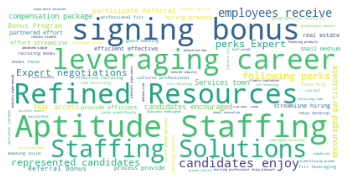

In [ ]:
# Wordcloud for Company File
wordcloud(df[df['fraudulent']==1].company_profile)

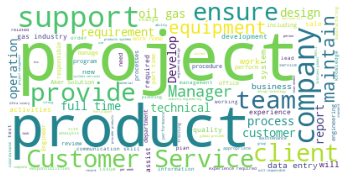

In [ ]:
# Wordcloud for Job Description
wordcloud(df[df['fraudulent']==1].description)

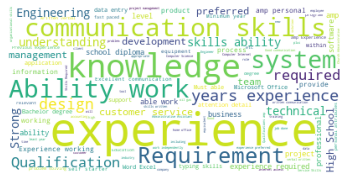

In [ ]:
# Wordcloud for Job Requirements
wordcloud(df[df['fraudulent']==1].requirements)

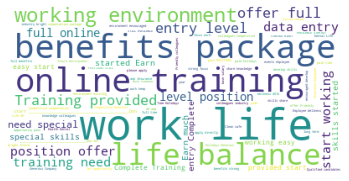

In [ ]:
# Wordcloud for Benefits
wordcloud(df[df['fraudulent']==1].benefits)

It turns out that indeed our guesses are partially right. The fake ones do tend to promise bonus and benefits, compliment their own products, guarantee work life balance.

So as a job seeker, people should keep in mind that when a job recruiting post looks quite promising to you, ensuring good welfare, you should calm down and assess it.

# 5. Conclusions & Suggestions

**Conclusions With Suggestions:** 

- Our self designed model has validation accuracy around 96%, which is slightly higher than 95% (considering our inbalanced dataset)
- The pre-trained model has validation accuracy around 97%, slightly better than our self desgined one.
- The job fraud tend to (sentiment ?
- The fake job recruiting news tend to talk positive of themselves: promise benefit and bonus, guarantee work life balance etc. Job seekers should be cautious when feeling extraodinary about one position.
- The fake job postings tend to focus on entry-level and executive level. This enlightened us that those fake ones either target 'too easy' or 'too difficult' group. They are manipulating people's minds.